### Programming and critical analysis

Recall the `pd_speech.arff` dataset from earlier homeworks, centered on the Parkinson diagnosis from 
speech features. For the following exercises, normalize the data using `sklearn`’s `MinMaxScaler`.

1. Using `sklearn`, apply k-means clustering fully unsupervisedly (without targets) on the 
normalized data with 𝑘 = 3 and three different seeds (using random ε {0,1,2}). Assess the 
silhouette and purity of the produced solutions.

3. Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original 
Parkinson diagnoses, and ii) the previously learned 𝑘=3 clusters (random=0). To this end, select 
the two most informative features as axes and color observations according to their label. For feature 
selection, select the two input variables with highest variance on the MinMax normalized data.

4. The fraction of variance explained by a principal component is the ratio between the 
variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues). 
How many principal components are necessary to explain more than 80% of variability? 
Hint: explore the DimReduction notebook to be familiar with PCA in `sklearn`.

### Dúvidas:


In [99]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics


# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df['class']))


for i in range(0,3):
    # Create the classifier
    kmeans = KMeans(n_clusters=3, init="random", random_state=i)
    # Fit the classifier to the data
    kmeans.fit(X)
    # Determine the silhouette score
    sil_score = silhouette_score(X, kmeans.labels_)
    
    # Determine the purity score
    # The purity score is the sum of the largest value in each column divided by the total number of samples
    purity_score = metrics.cluster.contingency_matrix(truth, kmeans.labels_).max(axis=0).sum() / truth.shape[0]

    print("Silhouette score for iteration", i, "is", sil_score)
    print("Purity score for iteration", i, "is", purity_score)


Silhouette score for iteration 0 is 0.6061811635543624
Purity score for iteration 0 is 0.746031746031746
Silhouette score for iteration 1 is 0.6018867012912252
Purity score for iteration 1 is 0.75
Silhouette score for iteration 2 is 0.6018867012912252
Purity score for iteration 2 is 0.75


### 2. What is causing the non-determinism?
The non-determinism is being caused by the random_state attribution. By using a different seed, the clusters will be initialized in different positions, and might converge slightly differently, although the variability is minimal, as can be seen by noting the fact that two of the iterations produced the same sillhouette and purity results, which can be attributed to the dataset having somewhat defined clusters.

### 3.
Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original
Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0). To this end, select
the two most informative features as axes and color observations according to their label. For feature
selection, select the two input variables with highest variance on the MinMax normalized data.

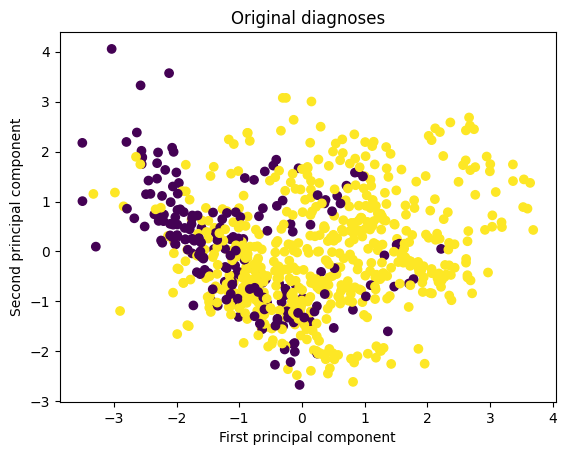

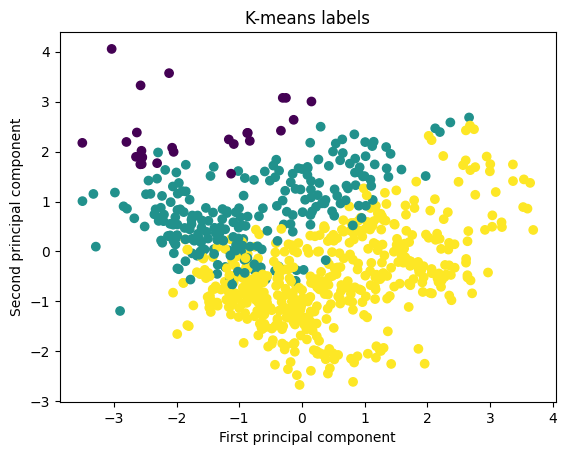

In [110]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt


# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df['class']))

# Determine the two most informative features
pca = PCA(n_components=2, svd_solver="full")
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Plot the original diagnoses
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=truth, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Original diagnoses')
plt.show()

kmeans = KMeans(n_clusters=3, init = "random", random_state=0).fit(X)
klabels = kmeans.labels_

# Plot the k-means labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=klabels, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('K-means labels')
plt.show()




# 4
The fraction of variance explained by a principal component is the ratio between the
variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues).
How many principal components are necessary to explain more than 80% of variability?
Hint: explore the DimReduction notebook to be familiar with PCA in sklearn.

[9.99984301e-01 1.11914523e-05 3.51348081e-06 5.55325445e-07
 1.66975144e-07 1.31152327e-07 5.37031062e-08 2.66545416e-08
 2.05483373e-08 8.58709547e-09]
[0.9999843  0.99999549 0.99999901 0.99999956 0.99999973 0.99999986
 0.99999991 0.99999994 0.99999996 0.99999997]


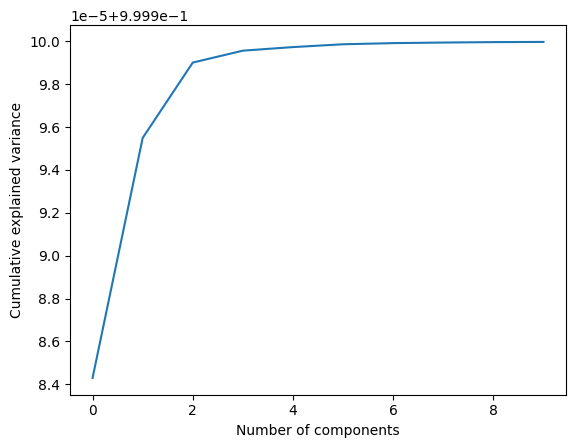

In [109]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt


# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df['class']))


# Determine the 10 most informative features
pca = PCA(n_components=10, svd_solver='full')
pca.fit(X)

# 
print((pca.explained_variance_ratio_))
cs = np.cumsum(pca.explained_variance_ratio_)
print(cs)

plt.plot(cs)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


[1.92586041e-01 1.26046974e-01 7.33813195e-02 5.96775653e-02
 3.86836905e-02 3.63334587e-02 2.54225139e-02 2.43800799e-02
 2.16448747e-02 2.10615417e-02 1.73788314e-02 1.68111339e-02
 1.41114246e-02 1.36846914e-02 1.15900406e-02 1.05664106e-02
 9.26519464e-03 8.85737592e-03 8.37464279e-03 7.56467731e-03
 7.16979436e-03 7.11479207e-03 6.30142644e-03 6.19141402e-03
 5.80790064e-03 5.54144520e-03 5.48090135e-03 5.26256286e-03
 5.01673119e-03 4.79890980e-03 4.53387985e-03 4.40143708e-03
 4.20078547e-03 4.07412971e-03 3.91674169e-03 3.81572322e-03
 3.65569877e-03 3.57352714e-03 3.37261571e-03 3.35434061e-03
 3.18651681e-03 3.16399355e-03 3.04230731e-03 2.91310763e-03
 2.80789887e-03 2.67603945e-03 2.62384982e-03 2.57134553e-03
 2.42610199e-03 2.38664291e-03 2.36247680e-03 2.27459379e-03
 2.22766742e-03 2.17919351e-03 2.13487831e-03 2.08567060e-03
 2.03266510e-03 1.94526871e-03 1.94028586e-03 1.86359520e-03
 1.85487540e-03 1.83757238e-03 1.80125101e-03 1.76726549e-03
 1.72295717e-03 1.675289

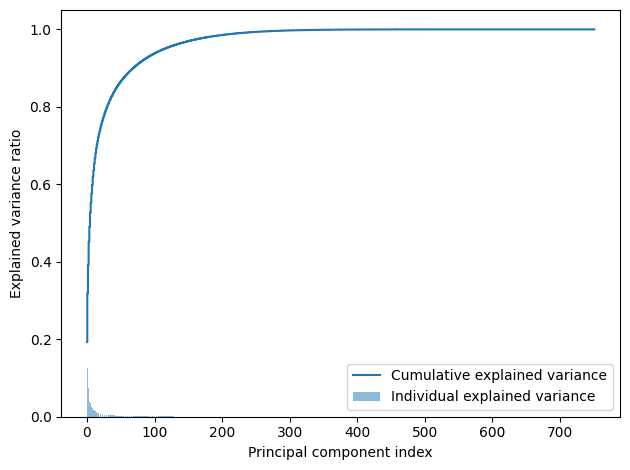

In [112]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

# Read the pd_speech.arff file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')

df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Determine the features which account for 80% of the variance
pca = PCA(svd_solver='full')
pca.fit(X_scaled)
exp_var_pca = pca.explained_variance_ratio_
cs_eigenvalues = np.cumsum(exp_var_pca)

for i in range(cs_eigenvalues.size):
    if cs_eigenvalues[i] >= 0.8:
        print("The number of components needed to account for 80% of the variance is", i+1)
        break

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cs_eigenvalues)), cs_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can conclude that the first principal component explains almost 100% of the variability, and thus it is sufficient to explain the requested 80%.